In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

print("Lütfen edgesIsparta.csv dosyanızı yükleyin.")
uploaded = files.upload()

Lütfen edgesIsparta.csv dosyanızı yükleyin.


Saving edgesIsparta.csv to edgesIsparta.csv


In [4]:
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path, delimiter=";")

In [5]:
G = nx.Graph()

for index, row in df.iterrows():
    G.add_edge(row['Köy1'], row['Köy2'], weight=row['Mesafe'])

**Graf Görselleştirme**

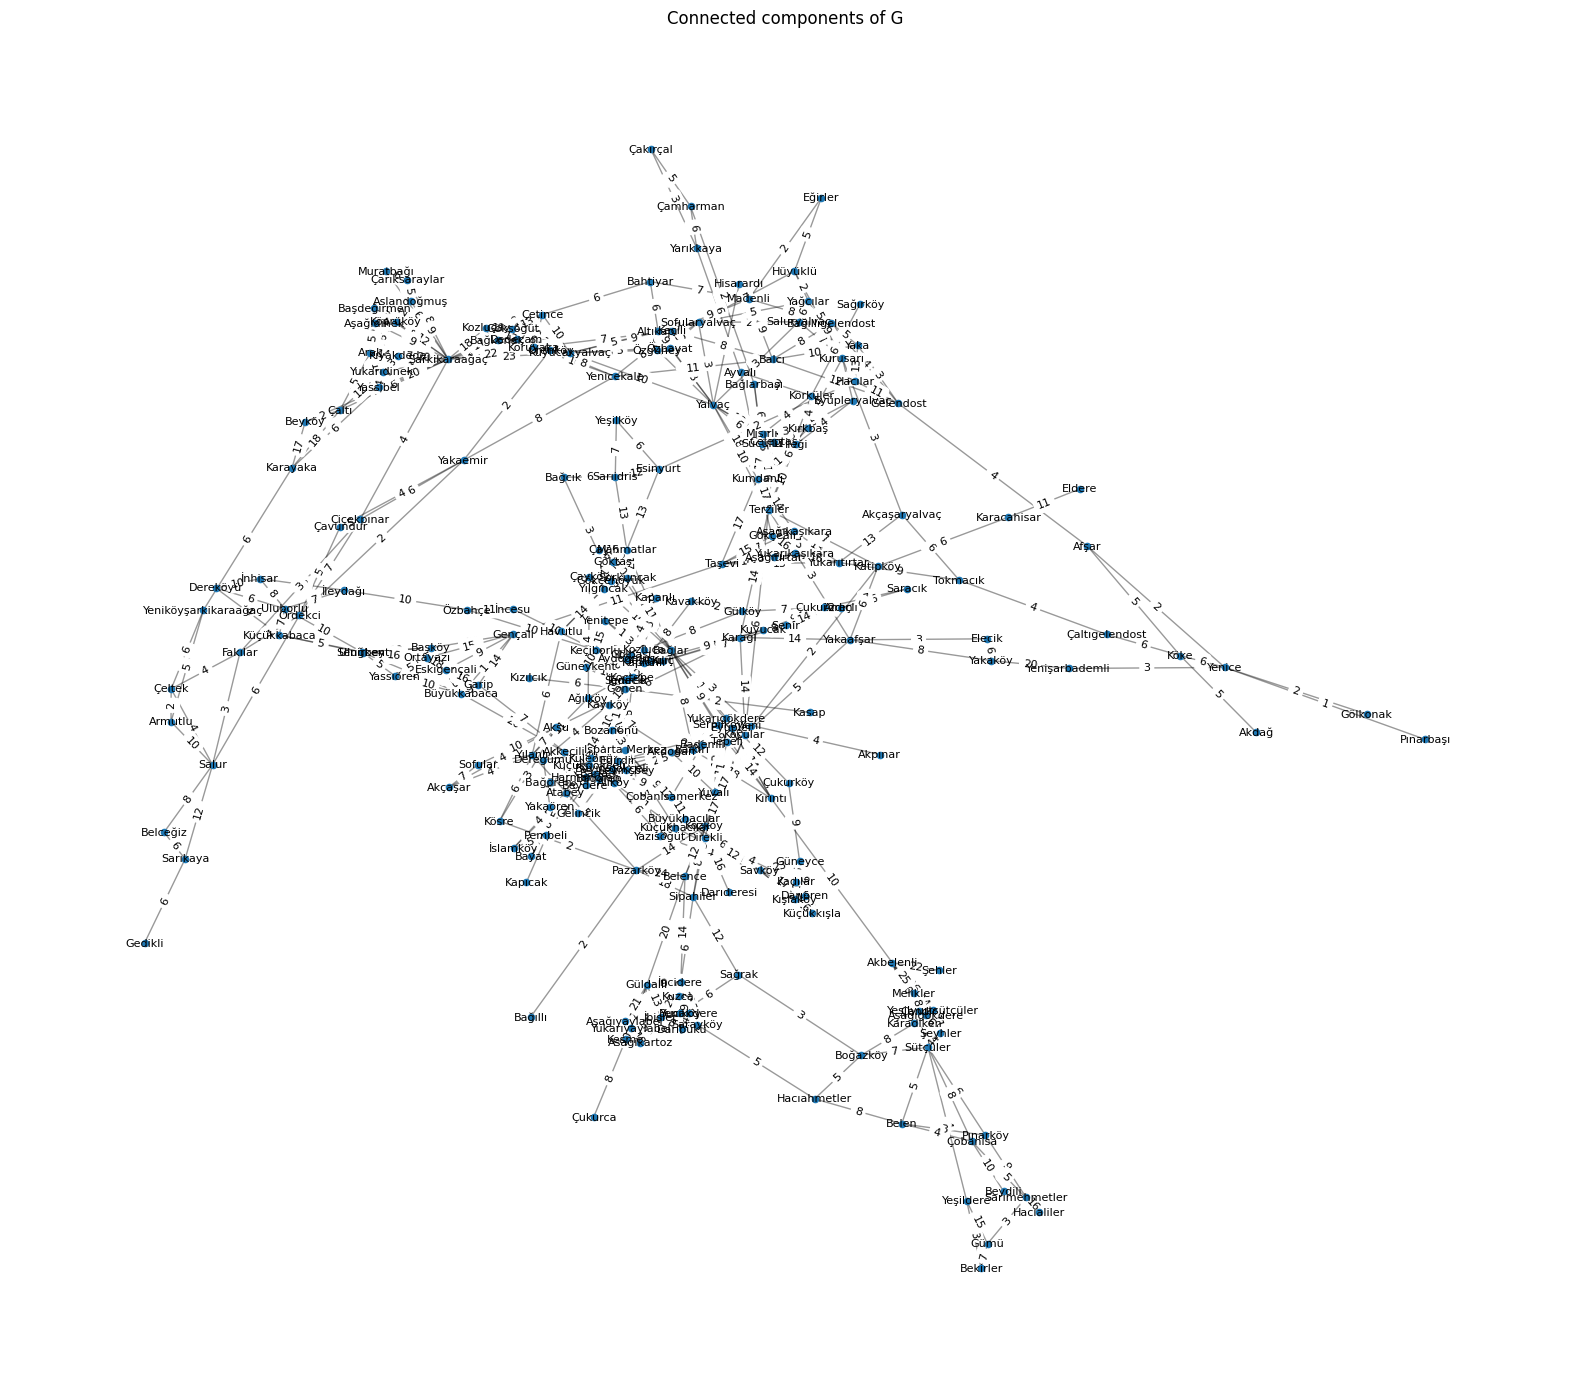

In [7]:
fig = plt.figure("Degree of a random graph", figsize=(20, 30))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
nx.draw_networkx_labels(Gcc, pos, ax=ax0, font_size=8)
edge_labels = nx.get_edge_attributes(Gcc, 'weight')
nx.draw_networkx_edge_labels(Gcc, pos, edge_labels=edge_labels, ax=ax0, font_size=8)
ax0.set_title("Connected components of G")
ax0.set_axis_off()
plt.show()

**Örnek En kısa Yol**

In [12]:
print(nx.shortest_path(G, "Yenitepe", "Gedikli", weight="weight"))


['Yenitepe', 'Yeşilyurt', 'Senirce', 'Kuleönü', 'Eğirdir', 'Yeni', 'Bağlar', 'Mahmatlar', 'Esinyurt', 'Hacılar', 'Yaka', 'Balcı', 'Yenicekale', 'Yakaemir', 'Ördekci', 'Salur', 'Sarıkaya', 'Gedikli']


**Topluluk Tespiti**

In [13]:
topluluk = nx.algorithms.community.greedy_modularity_communities(G)
for i, tekil in enumerate(topluluk):
    print(f"Topluluk {i+1}: {list(tekil)}", end="\n\n")

Topluluk 1: ['Pınarbaşı', 'Ayvalı', 'Mısırlı', 'Çaltıgelendost', 'Gökçeali', 'Yenice', 'Sücüllü', 'Akçaşaryalvaç', 'Yukarıtırtar', 'Yarıkkaya', 'Taşevi', 'Afşar', 'Köke', 'Bağlarbaşı', 'Eldere', 'Yakaafşar', 'Kırkbaş', 'Karağı', 'Elecik', 'Aşağıtırtar', 'Tokmacık', 'Katipköy', 'Sağırköy', 'Akdağ', 'Aşağıkaşıkara', 'Yenişarbademli', 'İleği', 'Çamharman', 'Çakırçal', 'Celeptaş', 'Yukarıkaşıkara', 'Karacahisar', 'Yakaköy', 'Körküler', 'Eyüpleryalvaç', 'Kumdanlı', 'Terziler', 'Gölkonak']

Topluluk 2: ['Şehler', 'Şeyhler', 'Közköy', 'Sipahiler', 'Asagikartoz', 'Sarayköy', 'Sütçüler', 'Yukarıyaylabel', 'Yeşildere', 'Kesme', 'İbişler', 'Sağrak', 'İncidere', 'Boğazköy', 'Belen', 'Çandır', 'Gümü', 'Hacıahmetler', 'Belence', 'Sarımehmetler', 'Kuzca', 'Koçular', 'Güldallı', 'Akbelenli', 'Çukurca', 'Bekirler', 'Yeniköy', 'Çobanisa', 'Melikler', 'Beydili', 'Karadiken', 'Darıbükü', 'Aşağıgökdere', 'Bucakdere', 'Yeşilyurtsütçüler', 'Hacıaliler', 'Aşağıyaylabel', 'Pınarköy']

Topluluk 3: ['İncesu', 'Ö

**En Kısa Yolların Uzunlukları**

In [15]:
shortest_path_lengths = dict(nx.all_pairs_dijkstra_path_length(G))
print(shortest_path_lengths)

{'Aliköy': {'Aliköy': 0, 'Küçükhacılar': 1, 'Büyükhacılar': 5, 'Yazısöğüt': 6, 'Savköy': 8, 'Bozanönü': 10, 'Isparta Merkez': 11, 'Kuleönü': 11, 'Bayat': 13, 'Küçükgökçeli': 16, 'Çobanisamerkez': 16, 'Kadılar': 16, 'Senirce': 16, 'Deregümü': 17, 'Küçükkışla': 18, 'Yakaören': 19, 'Direkli': 20, 'Büyükgökçeli': 21, 'Kayıköy': 21, 'Atabey': 21, 'Harmanören': 22, 'Gönen': 23, 'Gelincik': 23, 'Bademli': 23, 'Koçtepe': 24, 'Darıören': 25, 'İslamköy': 25, 'Kasap': 25, 'Pembeli': 26, 'Sevinçbey': 28, 'İğdecik': 28, 'Kapıcak': 28, 'Kışlaköy': 29, 'Kızılcık': 29, 'Beydere': 31, 'Güneyce': 31, 'Gölbaşı': 31, 'Eğirdir': 32, 'Yeni': 34, 'Darıderesi': 36, 'Güneykent': 37, 'Bağlar': 37, 'Akpınar': 38, 'Balkırı': 39, 'Bağören': 40, 'Çukurköy': 40, 'Barla': 41, 'Göktaş': 41, 'Bağören ': 42, 'Eyüpler': 42, 'Ağılköy': 43, 'Kılıç': 44, 'Keçiborlu': 44, 'Tepeli': 44, 'Çayköy': 46, 'Yılgıncak': 47, 'Çay': 47, 'Kozluca': 48, 'Sorkuncak': 48, 'Serpilköy': 50, 'Akdoğan': 50, 'Kaplanlı': 51, 'Yeşilyurt': 51, 'M

**Node Sayısı**

In [17]:
node_count = G.number_of_nodes()
print(node_count)

237


**Edge Sayısı**

In [18]:
edge_count = G.number_of_edges()
print(edge_count)

643


**Ortalama Derece**

In [21]:
degree_sequence = [d for n, d in G.degree()]
average_degree = sum(degree_sequence) / len(degree_sequence)
print(average_degree)

5.4261603375527425


**En Yüksek Ortadalık Merkeziyetine Sahip Köy**

In [26]:
centrality = nx.edge_betweenness_centrality(G, weight="weight")
print(max(centrality, key=centrality.get))

('Eğirdir', 'Yeni')
